In [ ]:
! pip install numpy scipy matplotlib ipywidgets 
! git clone https://github.com/ironcevic/integration_and_kinetics.git
%cd integration_and_kinetics

In [ ]:
from functions import *

# HERE WE LOAD THE DATA 
raw_data = np.loadtxt('integration_data.csv', delimiter=',', skiprows=1).T
x = raw_data[0]
signal1 = raw_data[1]
signal2 = raw_data[2]
signal3 = raw_data[3]

# ************************************************
# HERE WE SELECT WHICH SIGNAL TO INTEGRATE
signal = signal1
# ************************************************

Text(0.5, 1.0, 'Exact Integration')

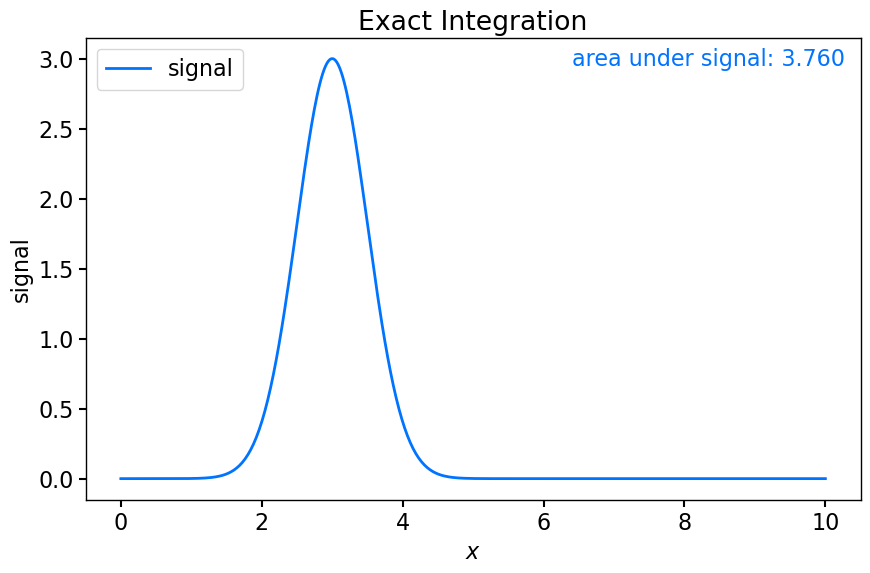

In [14]:
# INTEGRATE EXACTLY 
area = spi.trapezoid(signal, x)

# PLOT
plt.figure(figsize=(10, 6))
plt.annotate(f'area under signal: {area:.3f}', xy=(0.98, 0.98), xycoords='axes fraction', ha='right', va='top',color=colours['blue'])
plt.plot(x, signal, label='signal', color=colours['blue'])
plt.legend()
plt.xlabel('$x$')
plt.ylabel('signal')
plt.title('Exact Integration')

Text(0.5, 1.0, 'Exact vs Approximate Integration')

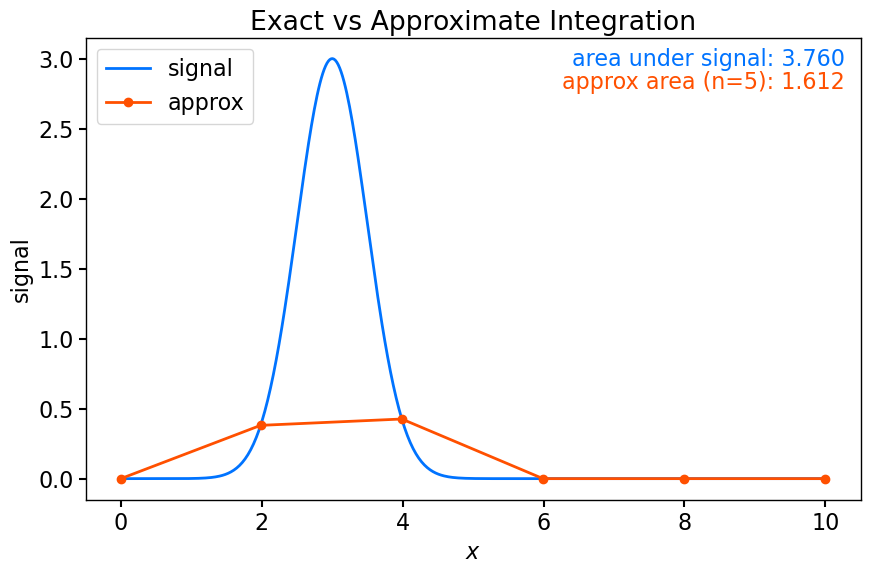

In [16]:
# COMPARE EXACT AND APPROXIMATE INTEGRATION

# INTEGRATE EXACTLY
area = spi.trapezoid(signal, x)

# INTEGRATE APPROXIMATELY
number_of_trapezoids = 5
area_approx, x_subset, y_subset = integrate_approx(signal, x, number_of_trapezoids)

# PLOT BOTH RESULTS
plt.figure(figsize=(10, 6))
plt.annotate(f'area under signal: {area:.3f}', xy=(0.98, 0.98), xycoords='axes fraction', color=colours['blue'], ha='right', va='top')
plt.annotate(f'approx area (n={number_of_trapezoids}): {area_approx:.3f}', xy=(0.98, 0.93), xycoords='axes fraction', color=colours['orange'], ha='right', va='top')
plt.plot(x, signal, label='signal', color=colours['blue'])
plt.plot(x_subset, y_subset, 'o-', color=colours['orange'], label='approx')
plt.legend()
plt.xlabel('$x$')
plt.ylabel('signal')
plt.title('Exact vs Approximate Integration')

Text(0.5, 1.0, 'Exact Integration')

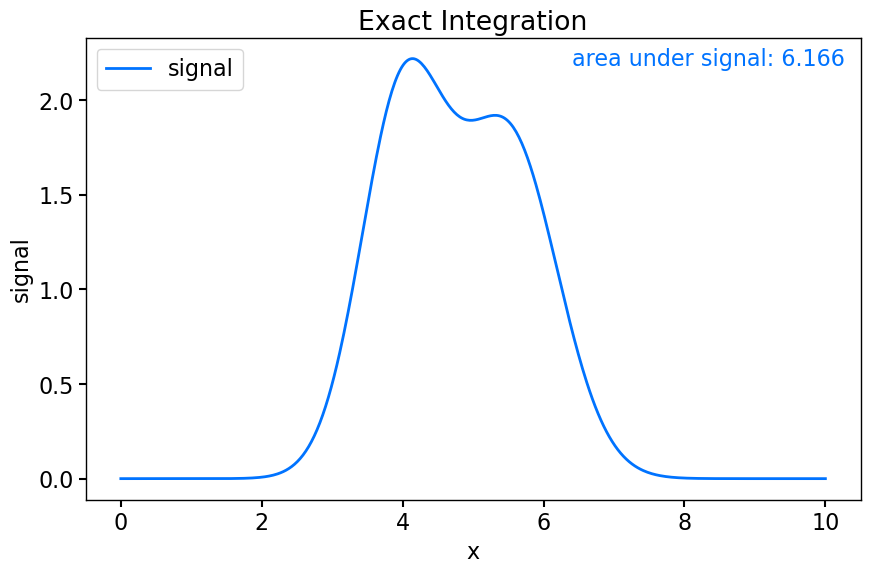

In [ ]:
# ************************************************
# LETS TRY ANOTHER SIGNAL
signal = signal3
# ************************************************

# INTEGRATE EXACTLY 
area = spi.trapezoid(signal, x)

# PLOT
plt.figure(figsize=(10, 6))
plt.annotate(f'area under signal: {area:.3f}', xy=(0.98, 0.98), xycoords='axes fraction', ha='right', va='top',color=colours['blue'])
plt.plot(x, signal, label='signal', color=colours['blue'])
plt.legend()
plt.xlabel('x')
plt.ylabel('signal')
plt.title('Exact Integration')

Text(0.5, 1.0, 'Exact vs Approximate Integration')

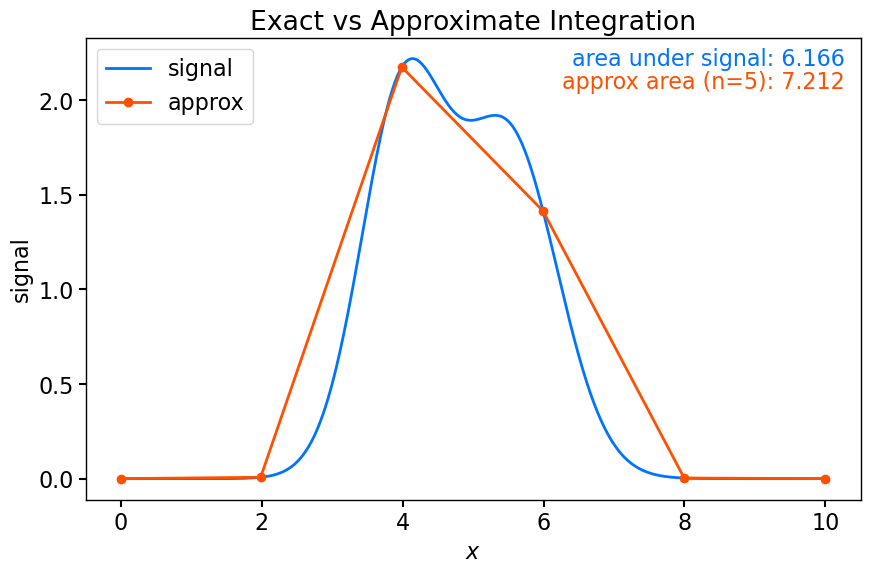

In [ ]:
# COMPARE EXACT AND APPROXIMATE INTEGRATION

# INTEGRATE EXACTLY
area = spi.trapezoid(signal, x)

# ************************************************
# INTEGRATE APPROXIMATELY
number_of_trapezoids = 5
area_approx, x_subset, y_subset = integrate_approx(signal, x, number_of_trapezoids)
# ************************************************

# PLOT BOTH RESULTS
plt.figure(figsize=(10, 6))
plt.annotate(f'area under signal: {area:.3f}', xy=(0.98, 0.98), xycoords='axes fraction', color=colours['blue'], ha='right', va='top')
plt.annotate(f'approx area (n={number_of_trapezoids}): {area_approx:.3f}', xy=(0.98, 0.93), xycoords='axes fraction', color=colours['orange'], ha='right', va='top')
plt.plot(x, signal, label='signal', color=colours['blue'])
plt.plot(x_subset, y_subset, 'o-', color=colours['orange'], label='approx')
plt.legend()
plt.xlabel('$x$')
plt.ylabel('signal')
plt.title('Exact vs Approximate Integration')

Text(0.5, 1.0, 'Exact vs Approximate Integration')

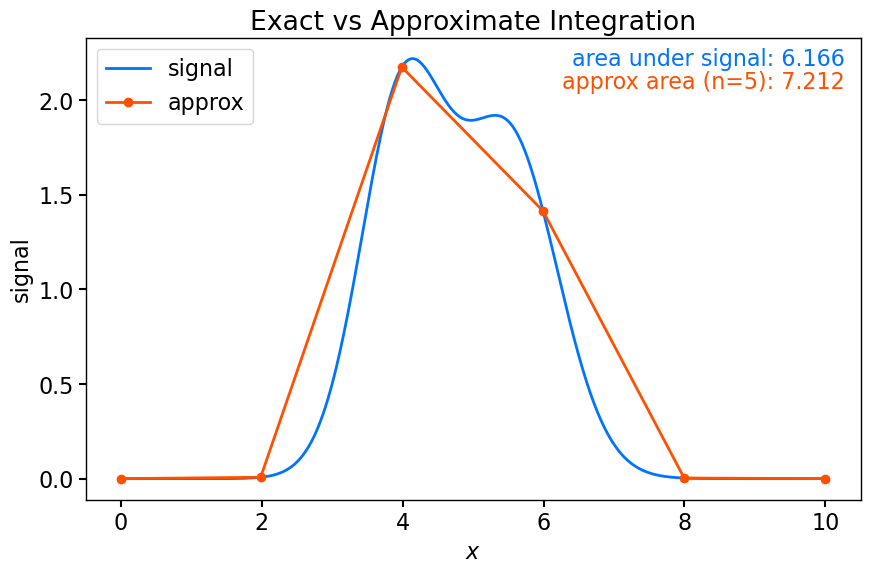

In [ ]:
# COMPARE EXACT AND APPROXIMATE INTEGRATION

# INTEGRATE EXACTLY
area = spi.trapezoid(signal, x)

# ************************************************
# INTEGRATE APPROXIMATELY
number_of_trapezoids = 5
area_approx, x_subset, y_subset = integrate_approx(signal, x, number_of_trapezoids)
# ************************************************

# PLOT BOTH RESULTS
plt.figure(figsize=(10, 6))
plt.annotate(f'area under signal: {area:.3f}', xy=(0.98, 0.98), xycoords='axes fraction', color=colours['blue'], ha='right', va='top')
plt.annotate(f'approx area (n={number_of_trapezoids}): {area_approx:.3f}', xy=(0.98, 0.93), xycoords='axes fraction', color=colours['orange'], ha='right', va='top')
plt.plot(x, signal, label='signal', color=colours['blue'])
plt.plot(x_subset, y_subset, 'o-', color=colours['orange'], label='approx')
plt.legend()
plt.xlabel('$x$')
plt.ylabel('signal')
plt.title('Exact vs Approximate Integration')

Text(0.5, 1.0, 'Manual Deconvolution - Guess')

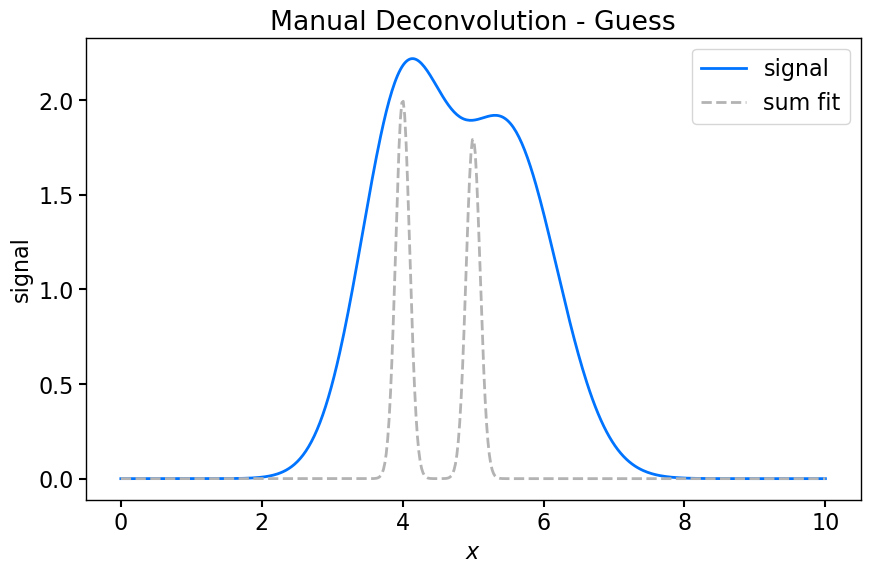

In [ ]:
# DECONVOLUTE MANUALLY

# ************************************************
# DEFINE THE GUESS GAUSSIANS
amplitude = [2.0, 1.8] # peak heights
mu = [4, 5] # peak centers
sigma = [0.1, 0.1] # peak widths
# ************************************************

# CALCULATE THE GUESS GAUSSIANS
guess = [amplitude[0], mu[0], sigma[0], amplitude[1], mu[1], sigma[1]]
g1_guess = gauss(x, amplitude[0], mu[0], sigma[0])
g2_guess = gauss(x, amplitude[1], mu[1], sigma[1]) 
g_sum_guess = g1_guess + g2_guess

# PLOT THE GUESS GAUSSIANS
plt.figure(figsize=(10, 6))
plt.plot(x, signal, label='signal', color=colours['blue'])
plt.plot(x, g_sum_guess, label='sum fit', color=colours['grey'], linestyle='--')
plt.legend()
plt.xlabel('$x$')
plt.ylabel('signal')
plt.title('Manual Deconvolution - Guess')

Text(0.5, 1.0, 'Automatic Deconvolution - Fit')

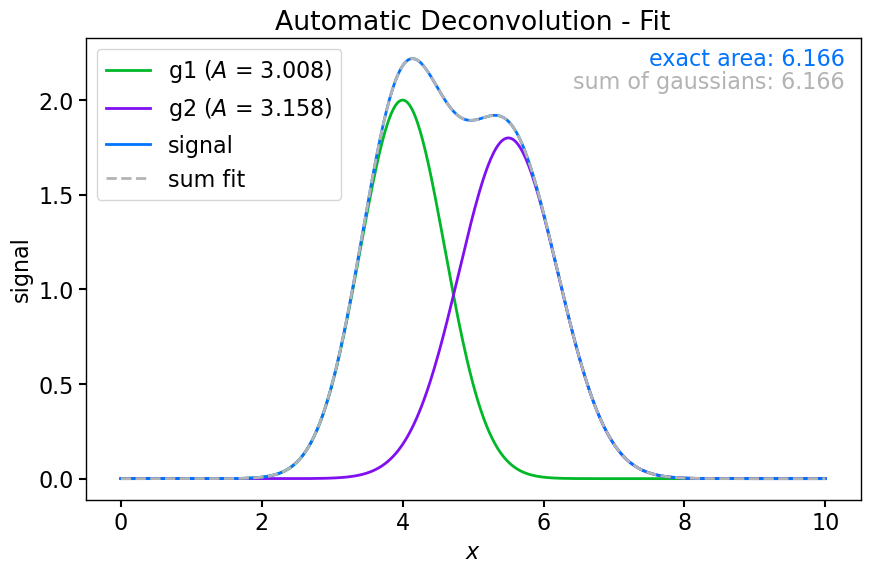

In [ ]:
# DECONVOLUTE AUTOMATICALLY

# DO THE FITTING 
popt, pcov = curve_fit(two_gauss, x, signal, p0=guess)
amplitude[0], mu[0], sigma[0], amplitude[1], mu[1], sigma[1] = popt

# CALCULATE THE FITTED GAUSSIANS
g1 = gauss(x, amplitude[0], mu[0], sigma[0])
g2 = gauss(x, amplitude[1], mu[1], sigma[1])
g_sum = g1 + g2

# CALCULATE THE AREA OF EACH GAUSSIAN ANALYTICALLY
area_g1 = amplitude[0] * sigma[0] * sqrt(2 * pi)
area_g2 = amplitude[1] * sigma[1] * sqrt(2 * pi)

# CALCULATE THE TOTAL AREA FROM THE FITTED GAUSSIANS
area_total = area_g1 + area_g2
# CALCULATE THE TOTAL AREA EXACTLY
area_exact = spi.trapezoid(signal, x)

# PLOT THE FIT
plt.figure(figsize=(10, 6))
plt.plot(x, g1, label=f'g1 ($A$ = {area_g1:.3f})', color=colours['green'])
plt.plot(x, g2, label=f'g2 ($A$ = {area_g2:.3f})', color=colours['purple'])
plt.plot(x, signal, label='signal', color=colours['blue'])
plt.plot(x, g_sum, label='sum fit', color=colours['grey'], linestyle='--')
plt.annotate(f'exact area: {area_exact:.3f}', xy=(0.98, 0.98), xycoords='axes fraction', color=colours['blue'], ha='right', va='top')
plt.annotate(f'sum of gaussians: {area_total:.3f}', xy=(0.98, 0.93), xycoords='axes fraction', color=colours['grey'], ha='right', va='top')
plt.legend(loc='upper left')
plt.xlabel('$x$')
plt.ylabel('signal')
plt.title('Automatic Deconvolution - Fit')